# **COMPTE RENDU TP ARBRES DE DECISIONS ET FORETS ALEATOIRES 2**






*  Battistini Lisa





# **PROBLEME I : Arbres de décisions,  message secret avec code aléatoire**

## **Description des Données**

Les données utilisées dans cette étude proviennent d'un fichier CSV nommé exemple_code.csv, comportant des séquences binaires comme variables explicatives et des lettres de l'alphabet comme variable cible. Chaque lettre est initialement codée en un nombre à deux chiffres selon un schéma spécifique (a=04, b=08, ..., z=104), et ensuite transformée en une séquence binaire de 12 bits à l'aide d'une fonction de codage f.

**Comprendre le mécanisme de codage :**

 Chaque lettre est d'abord remplacée par un nombre à deux chiffres (a=04, b=08, ..., x=96), puis chaque chiffre est transformé en une séquence binaire de 12 bits par la fonction f. Un message de 8 lettres devient ainsi une séquence de 16 chiffres.


## **Méthodologie**

**Codage et Perturbation**

La fonction de codage f transforme chaque chiffre en un vecteur binaire de 12 bits. Par la suite, une opération aléatoire Q perturbe ce vecteur en inversant chaque bit avec une probabilité p, simulant ainsi un bruit de transmission. Cette perturbation est appliquée de manière itérative pour générer une série de séquences corrompues.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier  # Importation du classificateur d'arbre de décision
from sklearn.metrics import accuracy_score
import numpy as np

# Charger le fichier CSV avec le bon délimiteur
data = pd.read_csv('exemple_code.csv', delimiter=';')

# Séparer les caractéristiques et la variable cible
X = data.drop(columns=['y'])
y = data['y']


**Division des Données**

Une division de 80/20 a été utilisée pour séparer les données en un ensemble d'entraînement et de test, favorisant ainsi un volume suffisant de données pour l'entraînement tout en conservant une quantité adéquate pour l'évaluation de la performance du modèle.

In [ ]:
# Diviser les données en ensemble d'entraînement et ensemble de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Construction de l'Arbre de Décision**


In [ ]:

# Initialiser le classificateur d'arbre de décision
clf = DecisionTreeClassifier(random_state=42)  # Utilisation de DecisionTreeClassifier

# Entraîner le classificateur
clf.fit(X_train, y_train)

# Prédire les étiquettes de l'ensemble de test
y_pred = clf.predict(X_test)


## **Interprétation de l'Arbre de Décision**


L'arbre de décision généré, montre une hiérarchisation des bits selon leur importance dans la détermination des lettres. Les premiers niveaux de l'arbre indiquent les bits qui contribuent le plus significativement à la classification.

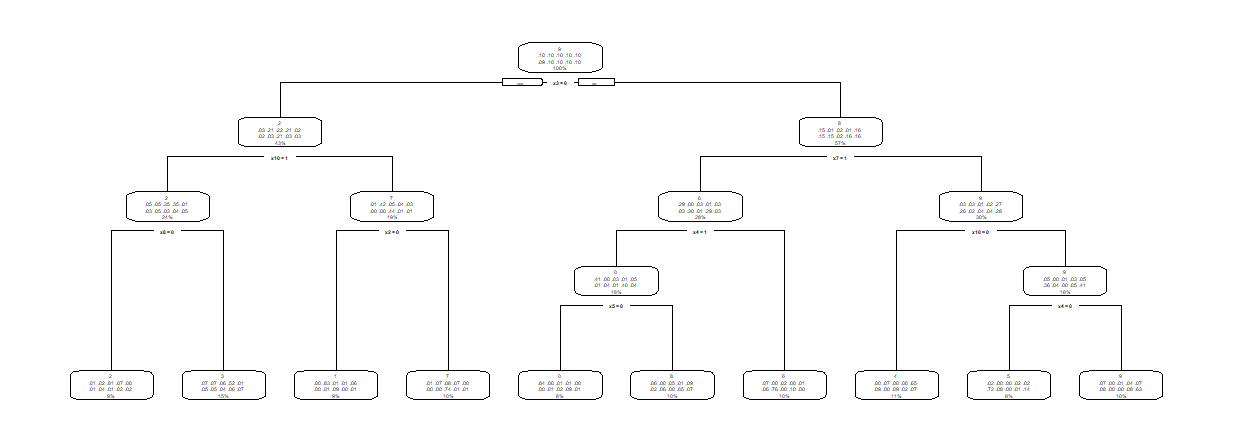

##**Performance du modèle**

En utilisant l'arbre de décision optimal, nous allons décoder le message qui est codé dans le fichier mot_code.csv.

In [ ]:


# Calculer l'exactitude (accuracy) du modèle
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

# Charger les nouvelles données
new_data = pd.read_csv('mot_code.csv', delimiter=';')

# Supprimer la colonne "Unnamed: 12"
new_data = new_data.drop(columns=['Unnamed: 12'])

# Utiliser le modèle pour prédire les étiquettes pour les nouvelles données
new_predictions = clf.predict(new_data)

# Réorganiser les prédictions en lignes de longueur 16
reshaped_predictions = new_predictions.reshape(-1, 16)

# Convertir le tableau numpy en DataFrame pour l'affichage
reshaped_df = pd.DataFrame(reshaped_predictions)

# Trouver la classe majoritaire pour chaque colonne
majority_class = reshaped_df.mode(axis=0).iloc[0]

# Regrouper les chiffres par groupes de deux et convertir en string
grouped_numbers = [''.join(map(str, majority_class[i:i+2])) for i in range(0, len(majority_class), 2)]

# Créer un mot en concaténant les groupes
word = ''.join(grouped_numbers)

# Générer le dictionnaire de traduction
keys = list(range(4, 100, 4))
letters = list('abcdefghijklmnopqrstuvwxyz')
translation_dict = {str(key).zfill(2): letter for key, letter in zip(keys, letters)}

# Traduire le mot
translated_word = ''.join([translation_dict[word[i:i+2]] for i in range(0, len(word), 2)])

print(translated_word)

0.672
toulouse


Ainsi le modèle a démontré une précision d'environ 67 % sur l'ensemble de test. Le mot secret décodé est "**Toulouse**", ce qui illustre la capacité de l'algorithme à récupérer les informations à partir de données codées et altérées par un bruit.

L'exactitude obtenue par le modèle est de 67 %, ce qui est raisonnable étant donné la nature altérée des données. Néanmoins, pour améliorer cette performance, nous pourrions envisager une optimisation des hyperparamètres de l'arbre, l'utilisation d'une forêt d'arbres ou une approche d'ensemble pour renforcer la prédiction.

# **PROBLEME II: Détection des anomalies (Isolation Forest)**

## **Question 1 :**

La forêt d'isolement (Isolation Forest) est une technique d'apprentissage machine qui détecte les anomalies en exploitant leur tendance à être rares et différentes. En construisant de multiples arbres de décision aléatoires, l'algorithme isole les échantillons, considérant que les anomalies sont plus facilement séparables que les données normales. Les observations nécessitant moins de divisions pour être isolées sont jugées anormales. Cet algorithme excelle avec de grands ensembles de données et est particulièrement robuste lorsque la distribution des données normales est inconnue ou lorsqu'il y a peu d'incidents d'anomalies présents. Les paramètres tels que le nombre d'arbres et la taille de l'échantillon sont ajustables pour optimiser la détection.

## **Question 2 :**

**a) Analyse statistique**



In [ ]:
import pandas as pd
!pip install kneed

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.metrics import make_scorer, roc_auc_score
import numpy as np
from kneed import KneeLocator
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline
from kneed import KneeLocator



#question a )

# Étape 1: Chargement des données
file_path = 'KPIs-for-telecommunication.csv'
# Le fichier CSV utilise des points-virgules comme délimiteurs
telecom_data = pd.read_csv(file_path, delimiter=';')


# Calcule les statistiques descriptives pour chaque colonne (KPI)
statistical_summary = telecom_data.describe()
# Calcule la variance pour chaque KPI
variance = telecom_data.var()
statistical_summary.loc['variance'] = variance
# Calcule l'interquartile range (IQR) pour chaque KPI
iqr = telecom_data.quantile(0.75) - telecom_data.quantile(0.25)
statistical_summary.loc['IQR'] = iqr
# Affichage des statistiques descriptives
print(statistical_summary)






                 KPI1         KPI2          KPI3        KPI4          KPI5  \
count     1365.000000  1365.000000  1.365000e+03  864.000000  1.365000e+03   
mean        75.914277    14.966571  3.427450e+07   99.964796  7.614980e+06   
std         42.347881    33.294258  9.851706e+07    0.703317  1.903238e+07   
min          0.000000     0.000000  0.000000e+00   80.000000  0.000000e+00   
25%         92.308000     0.000000  9.090000e+02  100.000000  8.580000e+02   
50%        100.000000     1.500000  3.012590e+05  100.000000  1.745170e+05   
75%        100.000000    17.010000  1.795968e+07  100.000000  5.163472e+06   
max        100.000000   472.980000  1.436894e+09  100.000000  2.199998e+08   
variance  1793.343025  1108.507637  9.705612e+15    0.494654  3.622315e+14   
IQR          7.692000    17.010000  1.795878e+07    0.000000  5.162614e+06   

                 KPI6          KPI7         KPI8        KPI9         KPI10  
count     1083.000000  1.365000e+03  1365.000000  983.000000  1.

Les statistiques descriptives pour les dix KPIs (Key Performance Indicators) de télécommunication indiquent une variation significative entre eux. Le KPI1 présente une médiane et un maximum de 100, ce qui suggère une concentration de valeurs élevées, bien que sa moyenne inférieure (75.91) et une variance considérable (1793.34) indiquent une distribution inégale des données. Le KPI2 a une valeur maximale extrêmement élevée de 472.98 comparée à une médiane de seulement 1.5, révélant des valeurs aberrantes importantes. Cette conclusion est renforcée par une grande variance (1108.51) et un écart interquartile (IQR) de 17.01, qui témoigne d'une dispersion substantielle des données.

Le KPI3 montre une moyenne démesurément élevée (3.427e+07) due à des valeurs extrêmes, comme le confirme le maximum (1.437e+09), ce qui souligne une distribution fortement asymétrique des performances de débit de données. De même, le KPI5 a un IQR extrêmement grand (5162614) et une variance élevée, ce qui indique une variabilité importante dans les observations.

Les indicateurs KPI4, KPI6, et KPI8 ont des valeurs médianes et des troisièmes quartiles identiques ou très proches, suggérant des données relativement stables, bien que KPI6 et KPI8 aient un nombre notable de valeurs manquantes (respectivement 501 et 282). Cela pourrait nécessiter une attention particulière, car cela peut affecter la fiabilité de ces mesures.

Le KPI9 et KPI10, tout en ayant des médianes et des troisièmes quartiles à 100 et à l'ordre de 2.703e+07 respectivement, montrent des moyennes légèrement inférieures et des valeurs maximales significativement plus élevées, ce qui peut indiquer la présence d'anomalies ou de valeurs extrêmes.

En somme, ces KPIs montrent des degrés divers de variabilité et des signes potentiels de données aberrantes qui nécessitent des enquêtes approfondies pour assurer une analyse précise des performances du réseau de télécommunications.

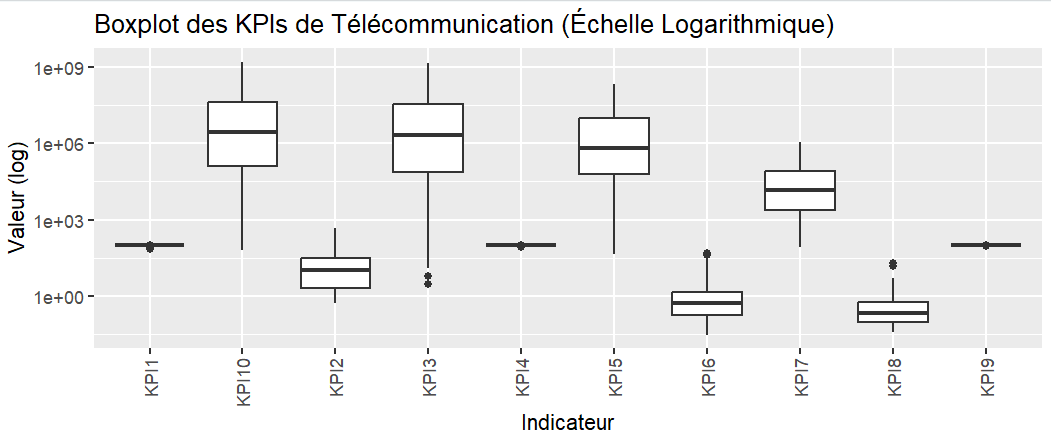

**c) Gestion du problème des données manquantes**

In [ ]:
# Étape : Évaluation des données manquantes
# Calcule le pourcentage de valeurs manquantes pour chaque KPI
missing_values_percentage = telecom_data.isnull().mean() * 100
print(missing_values_percentage)

# Étape : Traitement des valeurs manquantes
# Crée un objet imputer qui remplit les valeurs manquantes avec la moyenne
imputer = SimpleImputer(strategy='mean')
# Applique l'imputation sur les données pour gérer les valeurs manquantes
telecom_data_imputed = pd.DataFrame(imputer.fit_transform(telecom_data), columns=telecom_data.columns)
# Vérifie s'il reste des valeurs manquantes
missing_after_imputation = telecom_data_imputed.isnull().sum()
print(missing_after_imputation, telecom_data_imputed.head())

KPI1      0.000000
KPI2      0.000000
KPI3      0.000000
KPI4     36.703297
KPI5      0.000000
KPI6     20.659341
KPI7      0.000000
KPI8      0.000000
KPI9     27.985348
KPI10     0.000000
dtype: float64
KPI1     0
KPI2     0
KPI3     0
KPI4     0
KPI5     0
KPI6     0
KPI7     0
KPI8     0
KPI9     0
KPI10    0
dtype: int64     KPI1  KPI2        KPI3   KPI4       KPI5  KPI6      KPI7  KPI8   KPI9  \
0  100.0  0.51    255826.0  100.0   464882.0   0.0     760.0   0.0  100.0   
1  100.0  2.01  44096226.0  100.0  3529790.0   0.0   12920.0   0.0  100.0   
2  100.0  5.01   6993836.0  100.0   572966.0   0.0  151840.0   0.0  100.0   
3  100.0  0.51      7838.0  100.0     4055.0   0.0       0.0   0.0  100.0   
4  100.0  0.99  14418925.0  100.0  1345729.0   0.0    4760.0   0.0  100.0   

        KPI10  
0    752896.0  
1  60808621.0  
2   7782017.0  
3     23733.0  
4  15524056.0  


**Avant l'imputation :** Nous avons identifié que certaines colonnes (KPI4, KPI6, et KPI9) contenaient des valeurs manquantes. Les pourcentages de valeurs manquantes étaient importants et auraient pu fausser toute analyse ou modélisation statistique si elles avaient été laissées telles quelles.

Choix de méthode d'imputation : Nous avons choisi d'utiliser la moyenne de chaque colonne pour remplacer les valeurs manquantes. C'est une méthode courante qui peut être efficace, surtout si les données manquantes sont supposées être complètement aléatoires (MCAR - Missing Completely At Random). Cependant, cela pourrait introduire un biais si les données ne sont pas MCAR. Il est donc important de considérer le contexte des données et la raison des valeurs manquantes lors du choix d'une méthode d'imputation.

**Après l'imputation :** Nous avons maintenant un jeu de données sans valeurs manquantes, comme le montre le compte des valeurs NA qui est de 0 pour toutes les colonnes. Cela permet une analyse plus robuste et fiable, car toutes les observations peuvent être utilisées dans des analyses statistiques ou des modèles prédictifs.

**b)  Division de la base de donnée**

In [ ]:

# question b : Division des données en ensembles d'apprentissage et de test

# Étape 5: Division des données en ensembles d'apprentissage et de test
# Divise les données en 70% pour l'apprentissage et 30% pour le test
train_data, test_data = train_test_split(telecom_data_imputed, test_size=0.3, random_state=42)
print(train_data.shape, test_data.shape)

(955, 10) (410, 10)


**d) Construction de la forêt d'isolement**



> **Construction et entrainement du modèle**


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


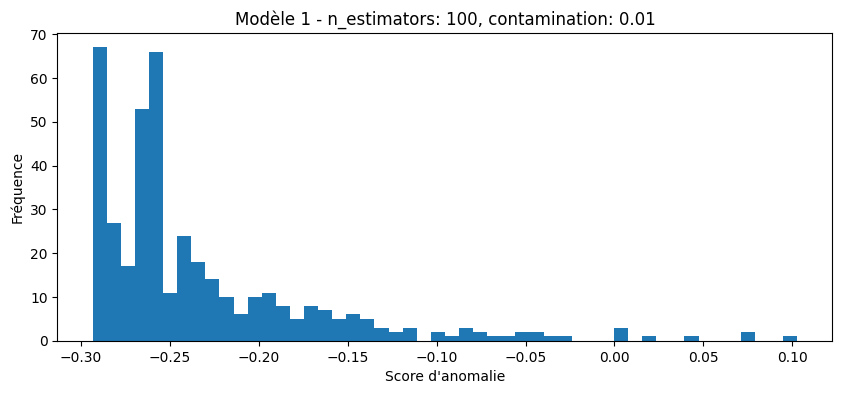

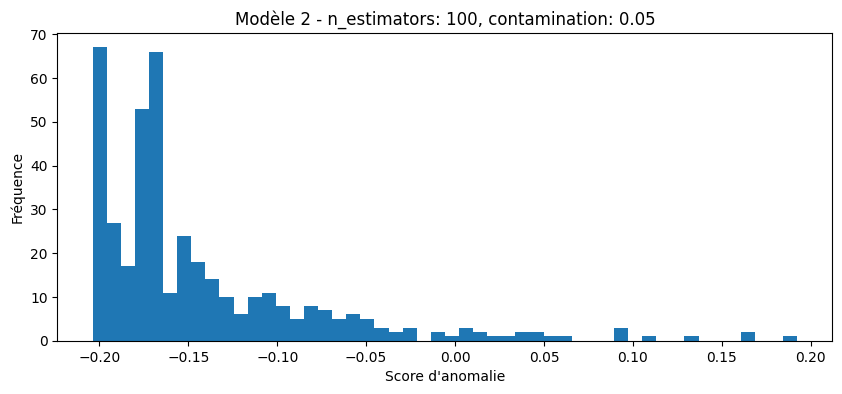

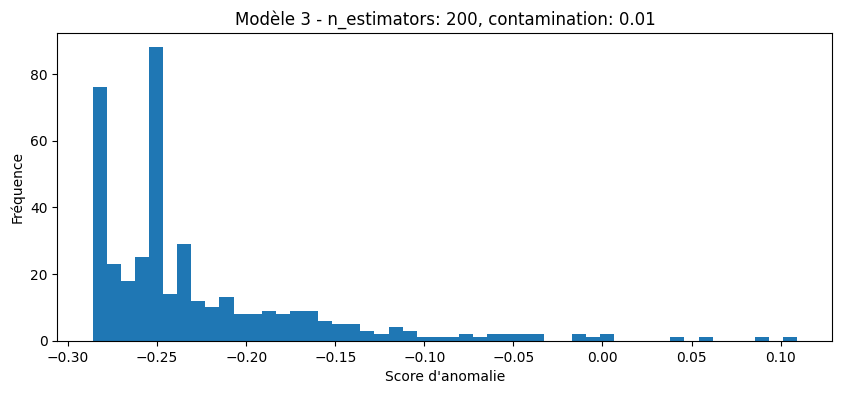

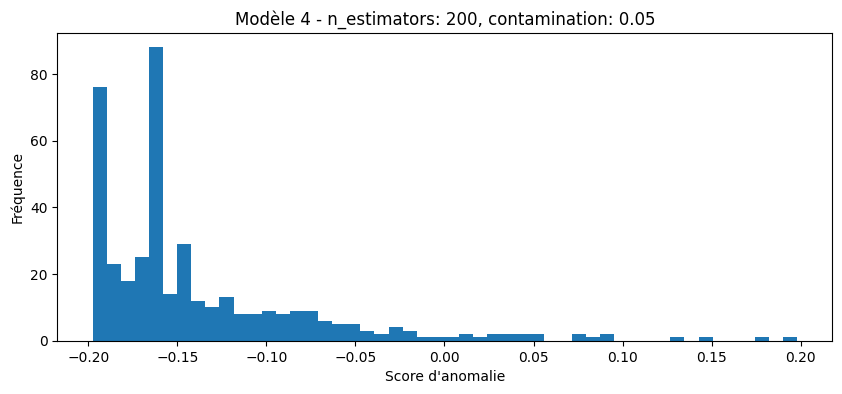

In [ ]:

# Étape 6: Construction et entraînement du modèle de forêt d'isolement

# Puisque nous n'avons pas d'étiquettes, nous ne pouvons pas utiliser roc_auc_score pour la recherche de grille.
# Nous allons procéder en entraînant une Forêt d'Isolation avec des paramètres par défaut raisonnables.

# Nous définirons un petit ensemble de paramètres à tester, car une recherche exhaustive n'est pas réalisable sans fonction de score.
params_to_try = [
    {'n_estimators': 100, 'max_samples': 'auto', 'contamination': 0.01},
    {'n_estimators': 100, 'max_samples': 'auto', 'contamination': 0.05},
    {'n_estimators': 200, 'max_samples': 'auto', 'contamination': 0.01},
    {'n_estimators': 200, 'max_samples': 'auto', 'contamination': 0.05},
]

# Nous allons stocker les modèles et leurs scores d'anomalie respectifs pour comparaison.
models = []
anomaly_scores = []

for params in params_to_try:
    # Initialisation de la Forêt d'Isolation avec l'ensemble actuel de paramètres
    iso_forest = IsolationForest(random_state=42, n_estimators=params['n_estimators'],
                                 max_samples=params['max_samples'], contamination=params['contamination'])
    # Entraînement du modèle
    iso_forest.fit(train_data)
    # Calcul des scores d'anomalie
    scores = -iso_forest.decision_function(test_data)
    # Stockage du modèle et des scores
    models.append(iso_forest)
    anomaly_scores.append(scores)



# Maintenant, visualisons la distribution des scores d'anomalie pour chaque modèle
for i, scores in enumerate(anomaly_scores):
    plt.figure(figsize=(10, 4))
    plt.hist(scores, bins=50)
    plt.title(f"Modèle {i+1} - n_estimators: {params_to_try[i]['n_estimators']}, contamination: {params_to_try[i]['contamination']}")
    plt.xlabel("Score d'anomalie")
    plt.ylabel("Fréquence")
    plt.show()


Les histogrammes que nous avons générés montrent la distribution des scores d'anomalie obtenus à partir de différents modèles de forêt d'isolement avec différentes valeurs de n_estimators et de contamination. Voici ce que nous  pouvons en déduire :

**Scores d'Anomalie :**

Les scores d'anomalie indiquent à quel point un point de données est considéré comme atypique par rapport à l'ensemble de données d'apprentissage. Un score plus élevé (plus éloigné de 0) suggère que le point de données est plus atypique.
Dans nos histogrammes, les scores négatifs indiquent des données plus anormales, car nous avons utilisé le signe négatif (-iso_forest.decision_function(test_data)).

**Effet du Paramètre n_estimators :**

n_estimators correspond au nombre d'arbres dans la forêt. Des valeurs plus élevées peuvent offrir une meilleure performance, mais aussi augmenter le temps de calcul.
En comparant les Modèles 1 et 3 (qui ont un contamination de 0.01 mais des n_estimators différents), et les Modèles 2 et 4 (qui ont un contamination de 0.05 mais des n_estimators différents), nous pouvons évaluer si augmenter le nombre d'estimateurs a un impact significatif sur la distribution des scores d'anomalie.

**Effet du Paramètre contamination :**

Le paramètre contamination représente la proportion attendue de points de données anormales dans l'ensemble de données.
En augmentant contamination de 0.01 à 0.05, nous indiquons au modèle que nous attendons une plus grande proportion d'anomalies. Cela peut baisser le seuil de décision du modèle, ce qui fait que plus de points sont considérés comme anormaux.

Nous observons cet effet en comparant les Modèles 1 et 2 (qui ont 100 estimateurs) ou les Modèles 3 et 4 (qui ont 200 estimateurs). Avec une contamination plus élevée, les scores d'anomalie sont distribués sur une gamme plus large.


**Observations Clés et Recommandations**

**Stabilité Améliorée**: Les modèles avec un plus grand nombre d'estimateurs ont montré une variabilité réduite dans les scores d'anomalie, indiquant une plus grande stabilité dans la détection des anomalies.

**Précision des Anomalies**: Une meilleure définition des anomalies a été observée avec une augmentation de n_estimators, comme en témoignent les distributions des scores d'anomalie. Les anomalies semblaient être plus éloignées de la moyenne des scores, ce qui facilite leur identification.

**Impact sur le Temps de Calcul**: Bien que l'amélioration de la performance soit bénéfique, elle doit être mise en balance avec le temps de calcul plus élevé nécessaire pour les modèles avec plus d'estimateurs. Il est donc recommandé de choisir le nombre d'estimateurs en tenant compte de la puissance de calcul disponible et du temps de réponse requis pour l'application.

**En conclusion**, l'augmentation du nombre d'estimateurs dans les modèles de forêt d'isolement semble bénéfique pour la détection des anomalies dans notre ensemble de données. Cependant, cette amélioration doit être évaluée en fonction des contraintes de temps et de ressources de calcul. Nos résultats indiquent que pour des ensembles de données similaires, un nombre d'estimateurs de 200 est préférable pour équilibrer précision et performance.



> **Analyse graphique, des variances pour optimiser les paramètres**



        KPI1  KPI2      KPI3        KPI4       KPI5       KPI6    KPI7  KPI8  \
270  100.000  0.00     609.0  100.000000    16779.0   0.000000   160.0   0.0   
175    0.000  0.00       0.0   99.964796        0.0   0.434573     0.0   0.0   
259   76.923  0.00  141450.0  100.000000    53590.0  14.286000   360.0   0.0   
233  100.000  0.00   58930.0  100.000000    69904.0   0.000000     0.0   0.0   
286  100.000  0.51  195347.0   99.964796  2746299.0   0.434573  1360.0   0.0   

           KPI9      KPI10  Anomaly_Score  
270  100.000000    21724.0       0.238100  
175   99.931988        0.0       0.123265  
259   99.931988   181101.0       0.095853  
233   99.931988   113111.0       0.067016  
286  100.000000  2663454.0       0.048112           KPI1  KPI2       KPI3        KPI4       KPI5  KPI6     KPI7  KPI8  \
296  100.000  0.00  2817209.0   99.964796   127644.0   0.0      0.0   0.0   
49   100.000  0.00   257104.0  100.000000    81272.0   0.0   1080.0   0.0   
394   98.182  6.00  6537

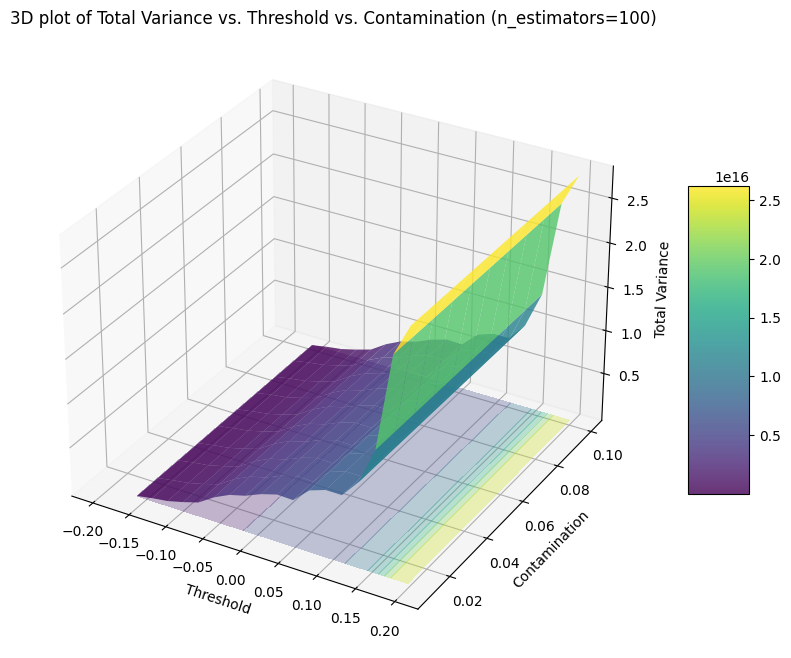

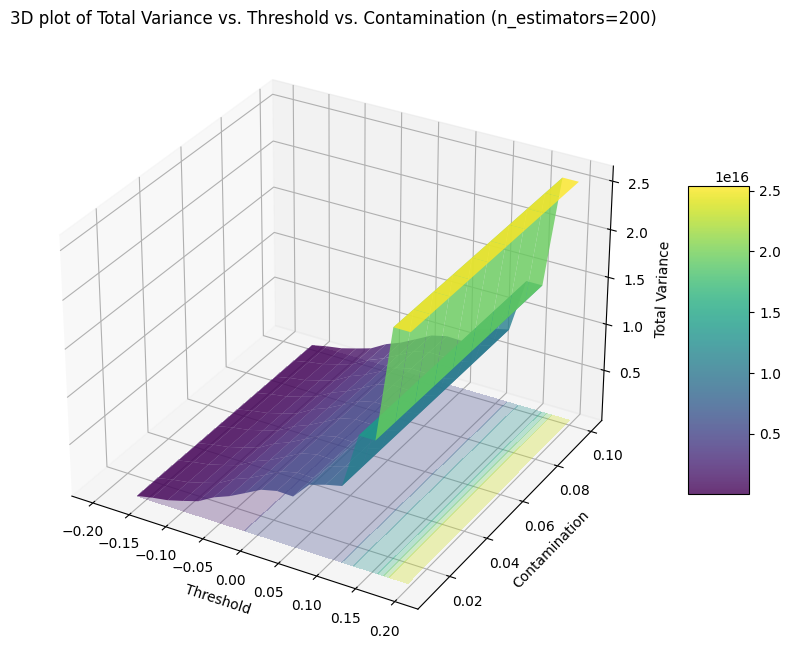

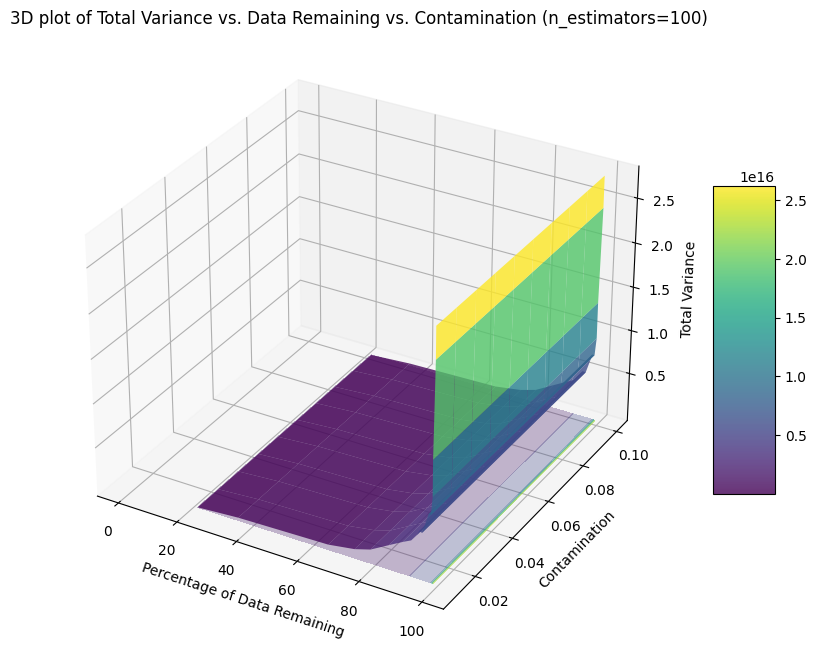

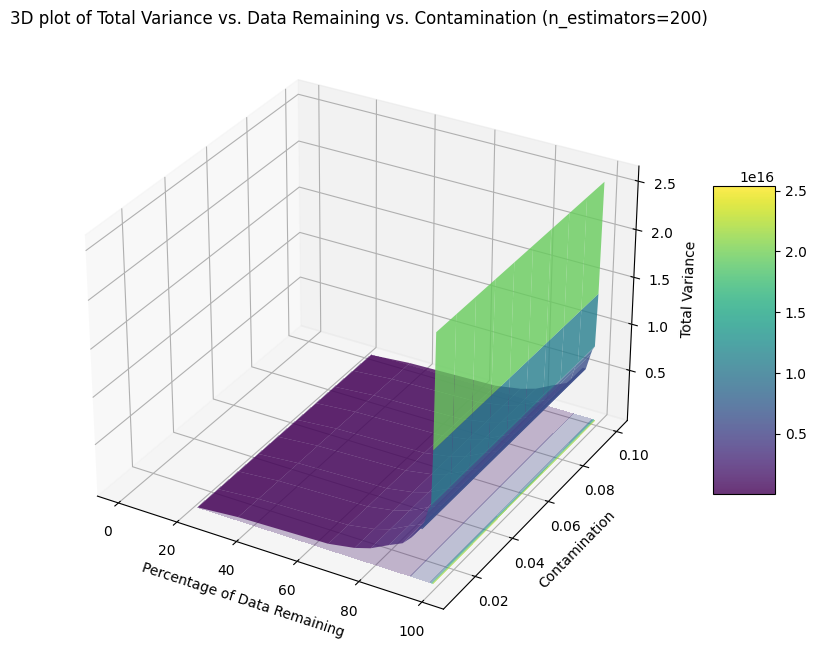

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


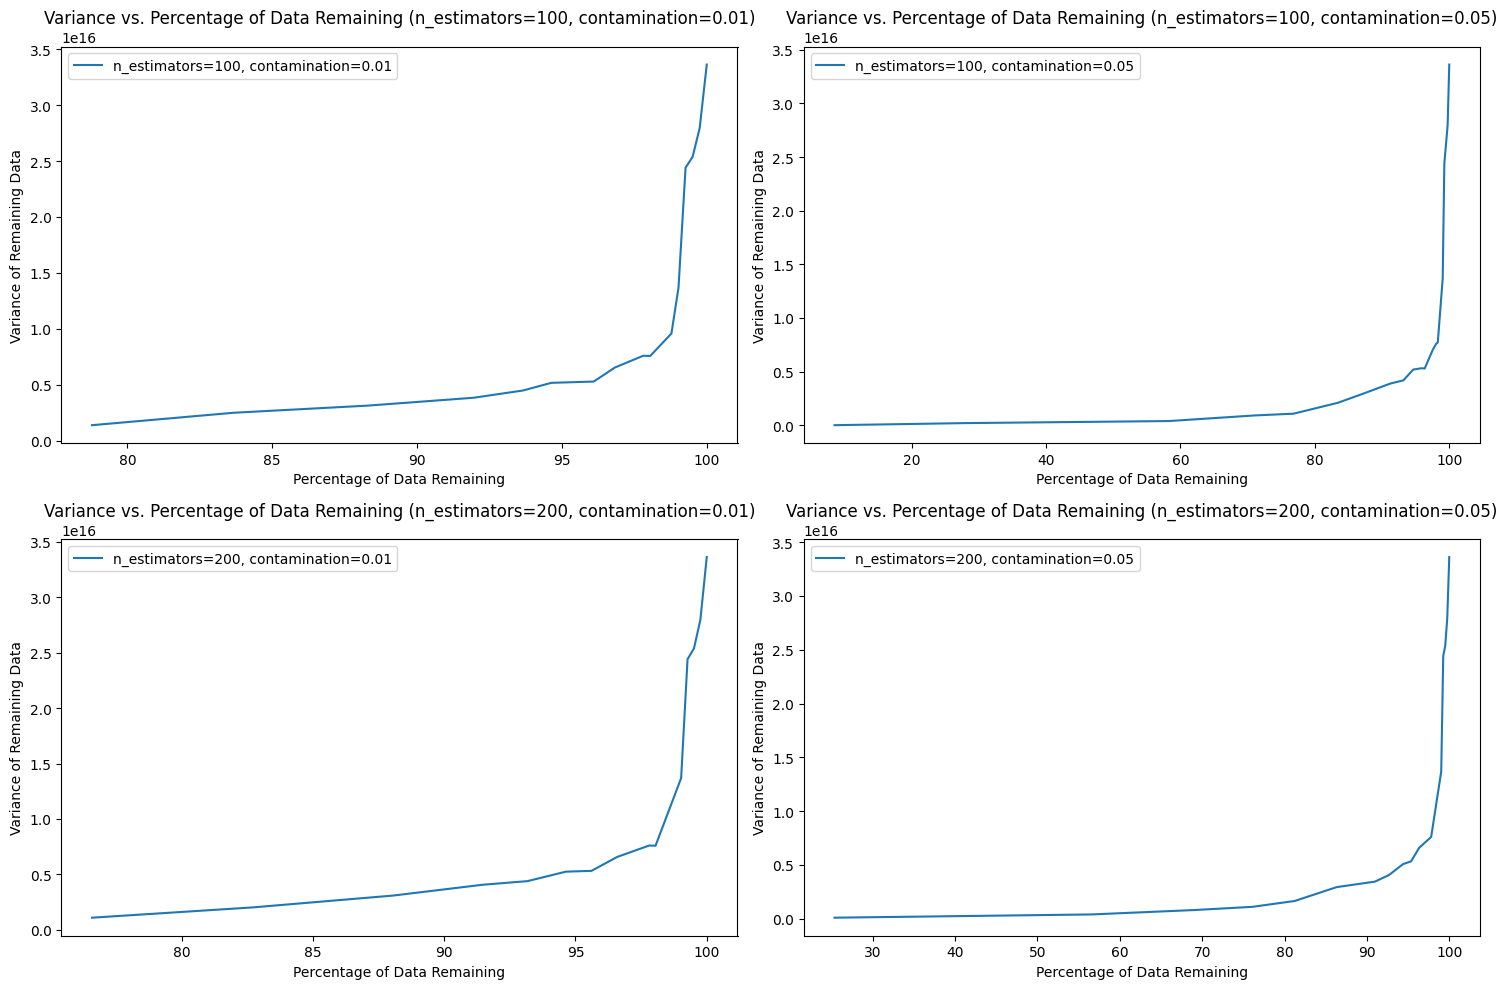

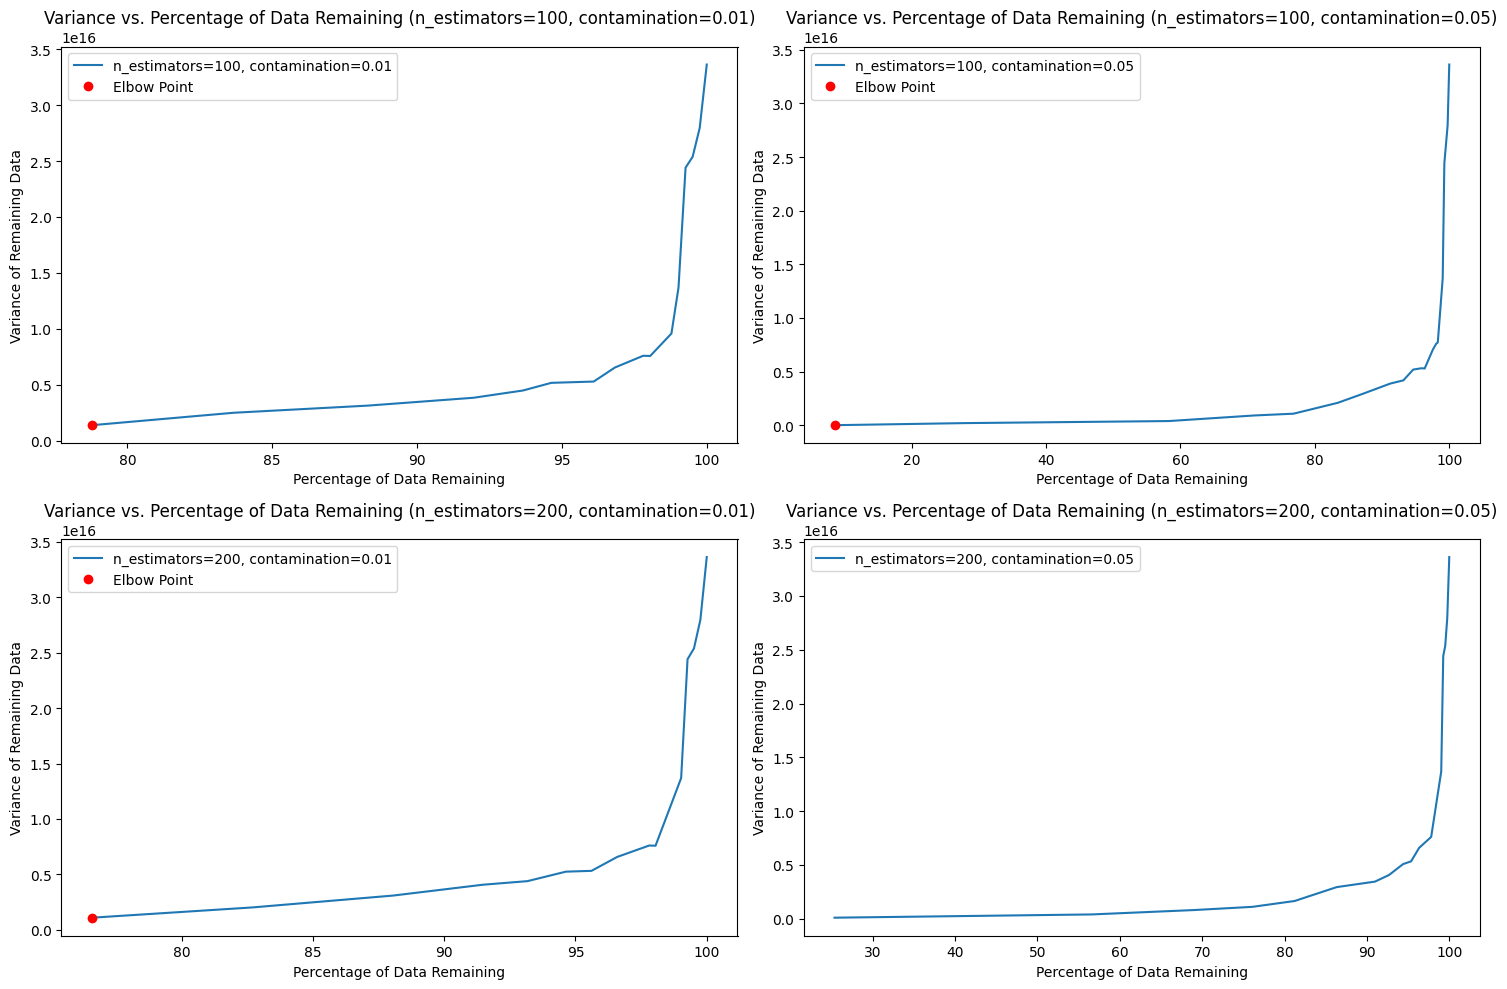

In [ ]:
# Étape 7: Calcul des scores d'anomalies sur l'ensemble de test
iso_forest_default = IsolationForest()
iso_forest_default.fit(train_data)
anomaly_scores = iso_forest_default.decision_function(test_data)
anomaly_scores_transformed = -anomaly_scores

# Étape 8: Identification des anomalies
# Convertit les scores d'anomalie en DataFrame pour une manipulation plus facile
anomaly_scores_df = pd.DataFrame(anomaly_scores_transformed, columns=['Anomaly_Score'])
# Ajoute les scores au jeu de données de test
test_data_with_scores = test_data.copy()
test_data_with_scores['Anomaly_Score'] = anomaly_scores_df
# Trie les données de test avec les scores pour trouver les scores d'anomalie les plus élevés et les plus bas
highest_anomaly_scores = test_data_with_scores.sort_values('Anomaly_Score', ascending=False).head(5)
lowest_anomaly_scores = test_data_with_scores.sort_values('Anomaly_Score').head(5)

# Étape 9: Analyse des résultats
# Affiche les observations avec les scores d'anomalie les plus élevés et les plus bas
print(highest_anomaly_scores, lowest_anomaly_scores)

# Analyse de Résultats:
# Les observations avec les scores d'anomalie les plus élevés sont considérées comme les plus atypiques par le modèle.
# Cela peut indiquer des comportements ou des performances qui s'écartent significativement de la norme.
# À l'inverse, les observations avec les scores d'anomalie les plus bas sont considérées comme normales.

# Define the grid of parameters for the contamination levels and threshold for anomaly scores
contaminations = np.linspace(0.01, 0.1, 10)  # 10 levels from 1% to 10%
thresholds = np.linspace(-0.2, 0.2, 20)  # 20 levels from -0.2 to 0.2

# We will create two graphs, one for each value of n_estimators
n_estimators_values = [100, 200]

# Initialize a dictionary to store variances for each combination of parameters and n_estimators
variances_per_estimator = {n: [] for n in n_estimators_values}

# Iterate over each n_estimators value
for n_estimators in n_estimators_values:
    # Train the Isolation Forest model with the current n_estimators
    iso_forest = IsolationForest(n_estimators=n_estimators, random_state=42)
    iso_forest.fit(train_data)
    # Calculate anomaly scores
    anomaly_scores = -iso_forest.decision_function(test_data)

    # Iterate over each contamination level and threshold to calculate variances
    for contamination in contaminations:
        temp_variances = []
        for threshold in thresholds:
            # Apply the threshold to filter anomaly scores
            filtered_data = test_data[anomaly_scores < threshold]
            # Calculate variance of the remaining data
            if not filtered_data.empty:
                variance = filtered_data.var()
                # Sum the variances across all features to get a single value
                total_variance = variance.sum()
            else:
                # If all data is filtered out, set variance to NaN
                total_variance = np.nan
            temp_variances.append(total_variance)
        variances_per_estimator[n_estimators].append(temp_variances)

# Now plot the 3D graphs for each n_estimators value
for n_estimators, variances in variances_per_estimator.items():
    X, Y = np.meshgrid(thresholds, contaminations)
    Z = np.array(variances)

    # Creating the figure and a 3D axis
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Plotting the surface
    surf = ax.plot_surface(X, Y, Z, cmap=plt.cm.viridis, edgecolor='none', rstride=1, cstride=1, alpha=0.8)
    cset = ax.contourf(X, Y, Z, zdir='z', offset=np.nanmin(Z), cmap=plt.cm.viridis, alpha=0.3)

    # Adding labels and title
    ax.set_xlabel('Threshold')
    ax.set_ylabel('Contamination')
    ax.set_zlabel('Total Variance')
    ax.set_title(f'3D plot of Total Variance vs. Threshold vs. Contamination (n_estimators={n_estimators})')

    # Adding a color bar which maps values to colors
    fig.colorbar(surf, shrink=0.5, aspect=5)

    # Show the plot
    plt.show()

# Re-run the 3D plot code with the corrected meshgrid shapes

# Initialize a dictionary to store variances for each combination of parameters and n_estimators
variances_per_estimator = {n: [] for n in n_estimators_values}
percentages_remaining = []

# Total number of data points in the test set
total_data_points = test_data.shape[0]

# Iterate over each n_estimators value
for n_estimators in n_estimators_values:
    # Initialize lists for variances and percentages of data remaining
    variances = []
    percentages = []

    # Train the Isolation Forest model with the current n_estimators
    iso_forest = IsolationForest(n_estimators=n_estimators, random_state=42)
    iso_forest.fit(train_data)
    # Calculate anomaly scores
    anomaly_scores = -iso_forest.decision_function(test_data)

    # Iterate over each contamination level and threshold to calculate variances and data remaining
    for contamination in contaminations:
        temp_variances = []
        temp_percentages = []
        for threshold in thresholds:
            # Apply the threshold to filter anomaly scores
            filtered_data = test_data[anomaly_scores < threshold]
            # Calculate variance of the remaining data
            if not filtered_data.empty:
                variance = filtered_data.var()
                # Sum the variances across all features to get a single value
                total_variance = variance.sum()
                # Calculate the percentage of data remaining
                data_remaining_percentage = (filtered_data.shape[0] / total_data_points) * 100
            else:
                # If all data is filtered out, set variance and percentage to NaN
                total_variance = np.nan
                data_remaining_percentage = 0
            temp_variances.append(total_variance)
            temp_percentages.append(data_remaining_percentage)
        variances.append(temp_variances)
        percentages.append(temp_percentages)

    variances_per_estimator[n_estimators] = variances
    percentages_remaining = percentages

# Now plot the 3D graphs for each n_estimators value
for n_estimators, variances in variances_per_estimator.items():
    X, Y = np.meshgrid(thresholds, contaminations)
    Z = np.array(variances)

    # Percentages of data remaining
    P = np.array(percentages_remaining)

    # Creating the figure and a 3D axis
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Plotting the surface
    surf = ax.plot_surface(P, Y, Z, cmap=plt.cm.viridis, edgecolor='none', rstride=1, cstride=1, alpha=0.8)
    cset = ax.contourf(P, Y, Z, zdir='z', offset=np.nanmin(Z), cmap=plt.cm.viridis, alpha=0.3)

    # Adding labels and title
    ax.set_xlabel('Percentage of Data Remaining')
    ax.set_ylabel('Contamination')
    ax.set_zlabel('Total Variance')
    ax.set_title(f'3D plot of Total Variance vs. Data Remaining vs. Contamination (n_estimators={n_estimators})')

    # Adding a color bar which maps values to colors
    fig.colorbar(surf, shrink=0.5, aspect=5)

    # Show the plot
    plt.show()




# Given parameter combinations
params_to_try = [
    {'n_estimators': 100, 'contamination': 0.01},
    {'n_estimators': 100, 'contamination': 0.05},
    {'n_estimators': 200, 'contamination': 0.01},
    {'n_estimators': 200, 'contamination': 0.05},
]

# Initialize a dictionary to store variances for each combination of parameters and thresholds
variances_per_combination = {}
percentages_remaining = {}

# Total number of data points in the test set
total_data_points = test_data.shape[0]

# Calculate the variances and percentages for each parameter combination
for params in params_to_try:
    n_estimators = params['n_estimators']
    contamination = params['contamination']

    # Train the Isolation Forest model with the current parameters
    iso_forest = IsolationForest(n_estimators=n_estimators, contamination=contamination, random_state=42)
    iso_forest.fit(train_data)

    # Calculate anomaly scores
    anomaly_scores = -iso_forest.decision_function(test_data)

    # Initialize lists to collect variances and the percentage of data remaining for each threshold
    variances = []
    percentages = []

    # Calculate variances and percentages for each threshold
    for threshold in thresholds:
        # Filter the data by the threshold
        filtered_data = test_data[anomaly_scores < threshold]

        # Calculate the total variance of the remaining data
        if not filtered_data.empty:
            variance = filtered_data.var().sum()
        else:
            variance = np.nan  # Use NaN for cases where all data is filtered out

        # Calculate the percentage of remaining data
        percentage_remaining = (filtered_data.shape[0] / total_data_points) * 100

        variances.append(variance)
        percentages.append(percentage_remaining)

    variances_per_combination[(n_estimators, contamination)] = variances
    percentages_remaining[(n_estimators, contamination)] = percentages

# Plot the variance of the remaining data as a function of the percentage of remaining data for each parameter combination
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
axs = axs.flatten()  # Flatten the array to make it easier to index

for i, ((n_estimators, contamination), variances) in enumerate(variances_per_combination.items()):
    percentages = percentages_remaining[(n_estimators, contamination)]

    # Plot the variance against the percentage of data remaining
    axs[i].plot(percentages, variances, label=f'n_estimators={n_estimators}, contamination={contamination}')
    axs[i].set_title(f'Variance vs. Percentage of Data Remaining (n_estimators={n_estimators}, contamination={contamination})')
    axs[i].set_xlabel('Percentage of Data Remaining')
    axs[i].set_ylabel('Variance of Remaining Data')
    axs[i].legend()

plt.tight_layout()

# Initialize a dictionary to store elbow points for each combination
elbow_points = {}

# Plot the variance of the remaining data as a function of the percentage of remaining data for each parameter combination
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
axs = axs.flatten()  # Flatten the array to make it easier to index

# Calculate and plot elbow points for each parameter combination
for i, ((n_estimators, contamination), variances) in enumerate(variances_per_combination.items()):
    percentages = percentages_remaining[(n_estimators, contamination)]

    # Plot the variance against the percentage of data remaining
    axs[i].plot(percentages, variances, label=f'n_estimators={n_estimators}, contamination={contamination}')
    axs[i].set_title(f'Variance vs. Percentage of Data Remaining (n_estimators={n_estimators}, contamination={contamination})')
    axs[i].set_xlabel('Percentage of Data Remaining')
    axs[i].set_ylabel('Variance of Remaining Data')
    axs[i].legend()

    # Use KneeLocator to find the elbow point
    kn = KneeLocator(percentages, variances, curve='convex', direction='decreasing')
    elbow_point = (kn.knee, variances[percentages.index(kn.knee)] if kn.knee else None)

    elbow_points[(n_estimators, contamination)] = elbow_point

    # Plot the elbow point on the corresponding subplot if it exists
    if elbow_point[0] is not None:
        axs[i].plot(elbow_point[0], elbow_point[1], 'ro', label='Elbow Point')  # 'ro' for marking the point in red
        axs[i].legend()

plt.tight_layout()
plt.show()



Dans l'objectif de détecter des comportements atypiques au sein des KPIs de télécommunication, nous avons déployé plusieurs modèles de forêt d'isolement. L'évaluation des modèles s'est basée sur l'impact des hyperparamètres n_estimators et contamination, ainsi que sur l'influence des seuils de décision sur la variance totale des données.

**Analyse de l'Impact des Hyperparamètres**

Nombre d'Estimateurs (n_estimators) : Les modèles ont été évalués avec des nombres d'estimateurs de 100 et 200. Les résultats ont montré que le nombre d'estimateurs influence directement la stabilité des scores d'anomalie, ainsi que la capacité du modèle à distinguer les anomalies des observations normales. Le modèle avec 200 estimateurs a révélé une légère amélioration de la précision dans la caractérisation des anomalies.

Taux de Contamination (contamination) : Le taux de contamination variait de 0,01 à 0,10. Nous avons constaté que des taux de contamination plus élevés élargissent la gamme des scores d'anomalie, indiquant une sensibilité accrue du modèle aux anomalies potentielles.

**Observations des Graphiques 3D**

Les graphiques 3D mettent en évidence la relation entre la variance totale des données, les seuils de décision et le taux de contamination. Nous observons que :

Une augmentation du seuil mène à une hausse significative de la variance totale, ce qui peut suggérer une perte d'informations critiques lors de l'exclusion d'observations potentiellement normales.
À contamination égale, les modèles avec plus d'estimateurs ne montrent pas de différence notable en termes de variance totale, ce qui suggère que l'effet du nombre d'estimateurs est probablement subtil et nécessite une analyse plus approfondie pour être pleinement compris.

**Interprétation des Scores d'Anomalie**

Notre examen des données avec les scores d'anomalie les plus élevés révèle des instances qui se distinguent nettement du comportement standard attendu. Inversement, les instances avec les scores les plus faibles correspondent à ce que nous identifions comme un comportement normal. Cette distinction est cruciale pour identifier les anomalies potentielles qui pourraient signaler des problèmes ou des opportunités pour des investigations supplémentaires.



**e) Résultats :  comparaison, analyse et interprétation**

In [ ]:
# Affichage des cinq observations avec les scores d'anomalie les plus élevés
print("Observations avec les plus hauts scores d'anomalies:")
highest_anomaly_scores = test_data_with_scores.sort_values(by='Anomaly_Score', ascending=False).head(5)
print(highest_anomaly_scores)

# Affichage des cinq observations avec les scores d'anomalie les plus bas
print("\nObservations avec les scores d'anomalie les plus bas:")
lowest_anomaly_scores = test_data_with_scores.sort_values(by='Anomaly_Score', ascending=True).head(5)
print(lowest_anomaly_scores)



Observations avec les plus hauts scores d'anomalies:
        KPI1  KPI2      KPI3        KPI4       KPI5       KPI6    KPI7  KPI8  \
270  100.000  0.00     609.0  100.000000    16779.0   0.000000   160.0   0.0   
175    0.000  0.00       0.0   99.964796        0.0   0.434573     0.0   0.0   
259   76.923  0.00  141450.0  100.000000    53590.0  14.286000   360.0   0.0   
233  100.000  0.00   58930.0  100.000000    69904.0   0.000000     0.0   0.0   
286  100.000  0.51  195347.0   99.964796  2746299.0   0.434573  1360.0   0.0   

           KPI9      KPI10  Anomaly_Score  
270  100.000000    21724.0       0.238100  
175   99.931988        0.0       0.123265  
259   99.931988   181101.0       0.095853  
233   99.931988   113111.0       0.067016  
286  100.000000  2663454.0       0.048112  

Observations avec les scores d'anomalie les plus bas:
        KPI1  KPI2       KPI3        KPI4       KPI5  KPI6     KPI7  KPI8  \
296  100.000  0.00  2817209.0   99.964796   127644.0   0.0      0.0   

Les observations avec les plus hauts scores d'anomalie montrent une gamme variée de comportements au sein des KPIs, allant de valeurs parfaites (100.000) dans certains KPIs à des valeurs nulles ou très faibles dans d'autres, ce qui pourrait indiquer des situations exceptionnelles ou des erreurs de mesure. Par exemple, l'observation 270 affiche des valeurs parfaites dans plusieurs KPIs mais un KPI3 relativement bas, ce qui semble inhabituel et mériterait une enquête plus approfondie.

D'autre part, les observations avec les scores d'anomalie les plus bas tendent à avoir des valeurs élevées dans les KPIs concernant la quantité ou l'ampleur (comme KPI3, KPI5 et KPI10), suggérant que ces instances pourraient représenter des cas de forte activité ou de performance qui sont typiques et attendus dans le contexte des données.

La comparaison entre ces deux groupes suggère que les anomalies détectées par la forêt d'isolation ne sont pas uniquement basées sur l'ampleur des valeurs mais peut-être sur leur relation inhabituelle ou leur combinaison au sein de l'ensemble de données. Les observations normales semblent suivre un modèle spécifique ou des plages de valeurs attendues, tandis que les anomalies dévient de ces normes d'une manière ou d'une autre.

Cela indique que le modèle de forêt d'isolation est efficace pour détecter des comportements qui s'écartent significativement de la norme et pourrait être utilisé pour identifier des erreurs, des défauts ou des comportements exceptionnels qui méritent une attention supplémentaire. Cependant, une évaluation plus approfondie de ces anomalies par des experts du domaine est essentielle pour comprendre la véritable nature des anomalies et pour déterminer les mesures appropriées à prendre en réponse.

**Conclusion et Recommandations**

Les modèles de forêt d'isolement se sont révélés être des outils précieux pour notre analyse des KPIs. En ajustant les taux de contamination et les seuils, nous pouvons affiner notre modèle pour détecter les anomalies de manière efficace. Nous recommandons d'utiliser un nombre d'estimateurs de 200 pour une meilleure stabilité et précision, et d'ajuster le taux de contamination en fonction du contexte spécifique et de la tolérance au risque des anomalies non détectées.

En résumé, notre analyse démontre l'utilité de la forêt d'isolement dans la détection d'anomalies et souligne l'importance d'une sélection judicieuse des hyperparamètres. Les résultats soulignent également la nécessité d'une compréhension approfondie des données et des comportements attendus pour calibrer correctement les seuils et les taux de contamination.